# Feedback & Regression

<!-- ```{code-cell} ipython3
%matplotlib inline
``` -->

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
sns.set_theme(font_scale=2,palette='colorblind')

data_url = 'https://raw.githubusercontent.com/rhodyprog4ds/rhodyds/main/data/310_data_22-midsem.csv'

## Feedback  from you

Here is the feedback from the survey that you completed with feedback on the course.

In [2]:
feedback_df_raw = pd.read_csv(data_url)

In [3]:
feedback_df_raw.head()

,How much do you think you've learned so far this semester?,How much of the material that's been taught do you feel you understand?,How do you think the achievements you've earned so far align with your understanding?,Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How well I follow instructions],Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [What I understand about the material],Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How much effort I put into assignments],How fair do you think the amount each of the following is reflected in the grading [How well I follow instructions],How fair do you think the amount each of the following is reflected in the grading [What I understand about the material],How fair do you think the amount each of the following is reflected in the grading [How much effort I put into assignments],Which of the following have you done to support your learning outside of class time?
0,4,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."
1,5,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."
2,3,3,I think they reflect my understanding well,Reflected moderately in the grading,Reflected moderately in the grading,Reflected moderately in the grading,Should be less reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, download and run the no..."
3,4,3,I think they reflect my understanding well,Reflected moderately in the grading,Reflected moderately in the grading,Reflected moderately in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, reading the documentati..."
4,5,2,I think they reflect my understanding well,Reflected moderately in the grading,Reflected strongly in the grading,Reflected a little in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Should be reflected more in the grading,"read the notes online, experimenting with the ..."


In [4]:
feedback_df_raw.columns

Index(['How much do you think you've learned so far this semester?',
       'How much of the material that's been taught do you feel you understand?',
       'How do you think the achievements you've earned so far align with your understanding?',
       'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How well I follow instructions]',
       'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [What I understand about the material]',
       'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How much effort I put into assignments]',
       'How fair do you think the amount each of the following is reflected in the grading [How well I follow instructions]',
       'How fair do you think the amount each of 

In [5]:
short_names = {"How much do you think you've learned so far this semester?":'learned',
    "How much of the material that's been taught do you feel you understand?":'understand',
    "How do you think the achievements you've earned so far align with your understanding?":'achievements',
    'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How well I follow instructions]':'grading_instructions',
    'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [What I understand about the material]':'grading_understanding',
    'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How much effort I put into assignments]':'grading_effort',
    'How fair do you think the amount each of the following is reflected in the grading [How well I follow instructions]':'fairness_instructions',
    'How fair do you think the amount each of the following is reflected in the grading [What I understand about the material]':'fairness_understanding',
    'How fair do you think the amount each of the following is reflected in the grading [How much effort I put into assignments]':'fairness_effort',
    'Which of the following have you done to support your learning outside of class time? ':'learning_activities'}

In [6]:
feedback_df_cols = feedback_df_raw.rename(columns=short_names)
feedback_df_cols.head(2)

,learned,understand,achievements,grading_instructions,grading_understanding,grading_effort,fairness_instructions,fairness_understanding,fairness_effort,learning_activities
0,4,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."
1,5,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."


In [7]:
learning_lists = feedback_df_cols['learning_activities'].str.split(',')
learning_stacked = learning_lists.apply(pd.Series).stack()
learning_df = pd.get_dummies(learning_stacked).sum(level=0)
learning_df.head()

/tmp/ipykernel_2621/3116911913.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  learning_df = pd.get_dummies(learning_stacked).sum(level=0)


,attended Aiden's office hours,attended Dr. Brown's office hours,download and run the notes,experimenting with the code from class,reading blogs or tutorials I find on my own,reading the documentation or course text,tinkering with code to answer other aspects of the material that I'm curious about,update the notes I took during class time,watching videos that I find on my own,download and run the notes,read the notes online,update the notes I took during class time
0,0,0,0,1,1,0,0,0,1,0,1,0
1,0,0,0,1,0,1,1,0,0,0,1,0
2,0,1,1,1,0,0,0,1,0,0,1,0
3,1,1,0,0,0,1,1,0,0,0,1,0
4,1,0,0,1,1,1,0,0,1,0,1,0


In [8]:
learning_df.sum()

 attended Aiden's office hours                                                          7
 attended Dr. Brown's office hours                                                      4
 download and run the notes                                                             4
 experimenting with the code from class                                                11
 reading blogs or tutorials I find on my own                                            9
 reading the documentation or course text                                              11
 tinkering with code to answer other aspects of the material that I'm curious about     5
 update the notes I took during class time                                              4
 watching videos that I find on my own                                                  7
download and run the notes                                                              1
read the notes online                                                                  13
update the

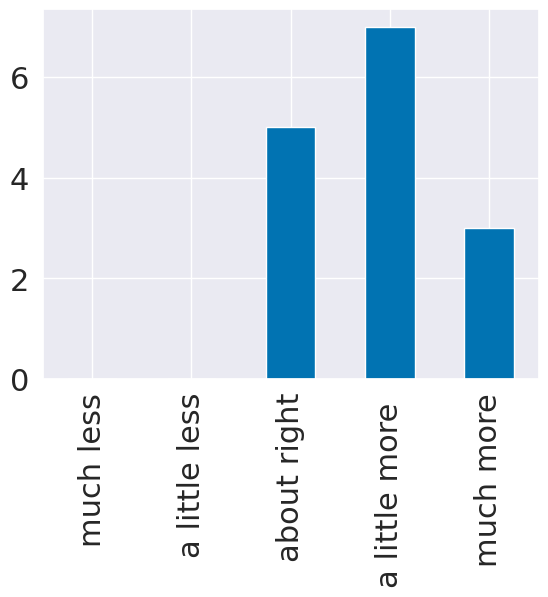

In [9]:
el_meaning = {1: 'much less',
 2: 'a little less',
 3: 'about right',
 4: 'a little more ',
 5: 'much more'}

question_text = list(short_names.keys())[list(short_names.values()).index('learned')]
el_counts,_ = np.histogram(feedback_df_cols['learned'],bins = [i+.5 for i in range(6)])
el_df = pd.DataFrame(data = el_counts,index = el_meaning.values(),columns= [question_text],)

# el_df.rename_axis(index='amount relative to expectations',inplace=True)
el_df.plot.bar(legend=False);
# sns.displot(feedback_df['learned'].replace(el_meaning))

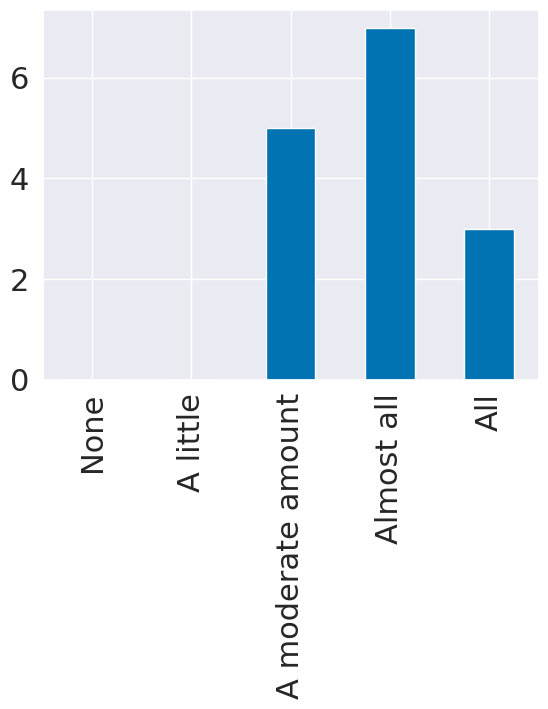

In [10]:
u_meaning = {0:'None', 1:'A little',3:'A moderate amount', 4:'Almost all',5:'All'}


question_text = list(short_names.keys())[list(short_names.values()).index('understand')]
u_counts,_ = np.histogram(feedback_df_cols['understand'],bins = [i+.5 for i in range(6)])
u_df = pd.DataFrame(data = el_counts,index = u_meaning.values(),columns= [question_text],)


u_df.plot.bar(legend=False);

# Responses to Qualitative Comments

- Going forward, the assignments are more tied together so you do not need to find as many datasets. I've made myself a note to go back and update A1-A5 for next year.
- [help by contirbuting recommended datasets](https://github.com/rhodyprog4ds/rhodyds)
- help by contributing do not use list to course website
- I will try to make sure that most code is prepared so I can send on prismia
- I recommend aligning your prismia & notebook side by side. (I cannot model this because of font size limitations)
- I've requested for longer blocks for next fall... but classroom availability (this is a good idea!)


## Regression



We're going to predict **tip** from **total bill** using 80% of the data for training.
This is a regression problem because the target, *tip* is a continuous value,
the problems we've seen so far were all classification, species of iris and the
character in that corners data were both categorical.  

Using linear regression is also a good choice because it makes sense that the tip
would be approximately linearly related to the total bill, most people pick some
percentage of the total bill.  If we our prior knowledge was that people
typically tipped with some more complicated function, this would not be a good
model.

In [11]:
tips_df = sns.load_dataset("tips")

In [12]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Split the data so that we use 80% of the data to train a modle to predict the tip from the total bill

In [13]:
tips_X = tips_df['total_bill'].values
tips_X = tips_X[:,np.newaxis] # add an axis
tips_y = tips_df['tip']

tips_X_train,tips_X_test, tips_y_train, tips_y_test = train_test_split(tips_X,tips_y,train_size=.8)

To see what that new bit of code did, we can examine the shapes:

In [14]:
tips_X.shape

(244, 1)

what we ended up  is 2 dimensions (there are two numbers) even though the second
one is 1.

In [15]:
tips_df['total_bill'].values.shape

(244,)

this, without the `newaxis` is one dimension, we can see that because there is
no number after the comma.  

Now that our data is ready, we create the linear regression estimator object

In [16]:
regr = linear_model.LinearRegression()

In [17]:
type(regr)

sklearn.linear_model._base.LinearRegression

Now we fit the model.

In [18]:
regr.fit(tips_X_train,tips_y_train)

LinearRegression()

We can examine the coefficients and intercept.

In [19]:
regr.coef_, regr.intercept_

(array([0.10071871]), 1.0151283331005216)

These define a line (y = mx+b) coef is the slope.


```{important}
This is what our model *predicts* the tip will be based on the past data.  It is
important to note that this is not what the tip *should* be by any sort of
virtues. For example, a typical normative rule for tipping is to tip 15% or 20%.
the model we learned, from this data, however is ~%10 + $1. (it's actually
9.68% + $1.028)
```

To interpret this, we can apply it for a single value. We trained this to
predict the tip from the total bill.  So, we can put in any value that's a
plausible total bill and get the predicted tip.


We can predict the data

In [20]:
tips_y_pred = regr.predict(tips_X_test)

In [21]:
type(tips_y_pred)

numpy.ndarray

To visualize in more detail, we'll plot the data as black points and the
predictions as blue points.  To highlight that this is a perfectly linear
prediction, we'll also add a line for the prediction.

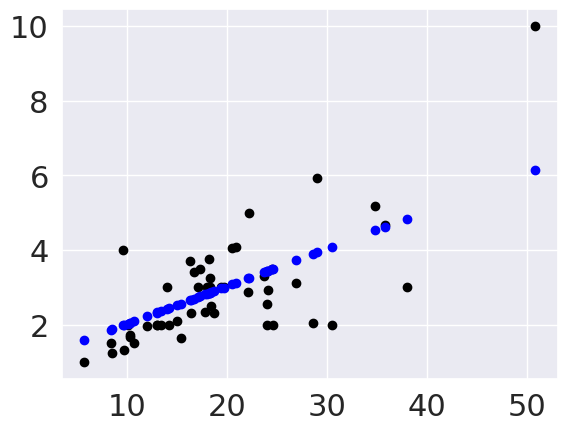

In [22]:
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.scatter(tips_X_test,tips_y_pred, color='blue')

``
## Evaluating Regression - Mean Squared Error

From the plot, we can see that there is some error for each point, so accuracy
that we've been using, won't work.  One idea is to look at how much error there
is in each prediction, we can look at that visually first.



These red lines are the {term}`residuals`.

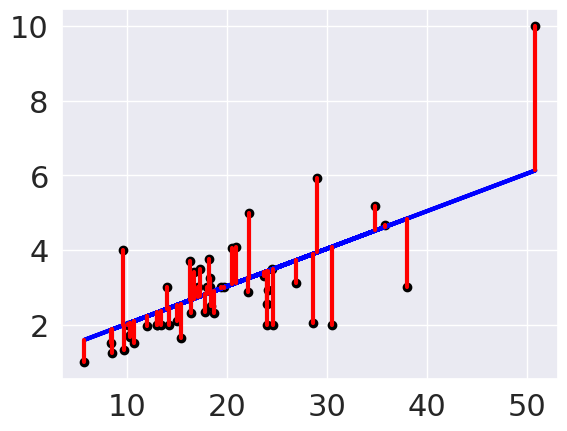

In [23]:
plt.scatter(tips_X_test, tips_y_test, color='black')
plt.plot(tips_X_test, tips_y_pred, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(tips_X_test, tips_y_pred,tips_y_test)];

We can use the average length of these red lines to capture the error. To get
the length, we can take the difference between the prediction and the data for
each point. Some would be positive and others negative, so we will square each
one then take the average.

In [24]:
mean_squared_error(tips_y_test,tips_y_pred)

1.0864219578359338

We can get back to the units being dollars, by taking the square root.

In [25]:
np.sqrt(mean_squared_error(tips_y_test, tips_y_pred))

1.0423156709154544

This is equivalent to using absolute value instead

In [26]:
np.mean(np.abs(tips_y_test - tips_y_pred))

0.75154747990877

## Evaluating Regression - R2

We can also use the $R^2$ score, the [coefficient of determination](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score).

If we have the following:
- $n$ `=len(y_test)``
- $y$ `=y_test`
- $y_i$ `=y_test[i]`
- $\hat{y}$ = `y_pred`
- $\bar{y} = \frac{1}{n}\sum_{i=0}^n y_i$ = `sum(y_test)/len(y_test)`

$$ R^2(y, \hat{y}) = 1 = \frac{\sum_{i=0}^n (y_i - \hat{y}_i)^2}{\sum_{i=0}^n (y_i - \bar{y}_i)^2} $$

In [27]:
r2_score(tips_y_test, tips_y_pred)

0.4987566006650662

This is a bit harder to interpret, but we can use some additional plots to
visualize.
This code simulates data by randomly picking 20 points, spreading them out
and makes the “predicted” y values by picking a slope of 3. Then I simulated various levels of noise, by sampling noise and multiplying the same noise vector by different scales and adding all of those to a data frame with the column name the r score for if that column of target values was the truth.

Then I added some columns of y values that were with different slopes and different functions of x. These all have the small amount of noise.

````{margin}
```{tip}
[Facet Grids](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) allow more customization than the figure level plotting functions
we have used otherwise, but each of those combines a FacetGrid with a
particular type of plot.
```
````

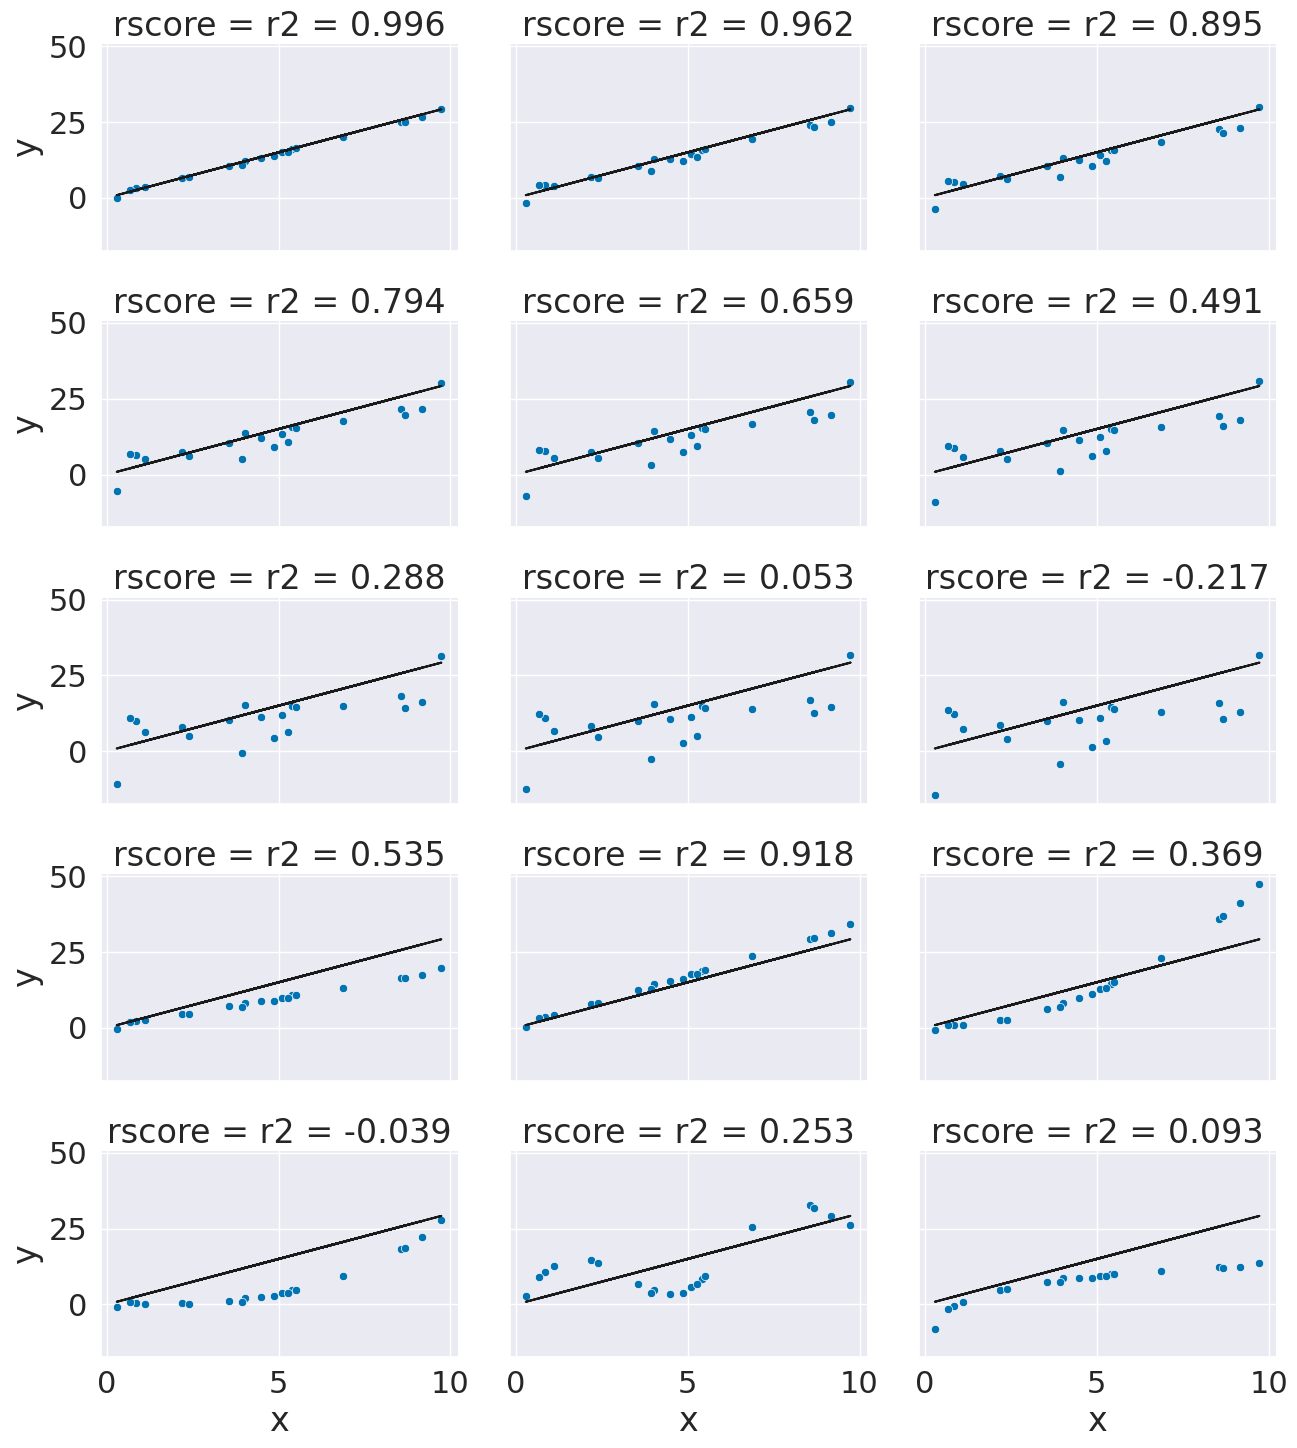

In [28]:
x = 10*np.random.random(20)
y_pred = 3*x
ex_df = pd.DataFrame(data = x,columns = ['x'])
ex_df['y_pred'] = y_pred
n_levels = range(1,18,2)
noise = (np.random.random(20)-.5)*2
for n in n_levels:
  y_true = y_pred + n* noise
  ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true

f_x_list = [2*x,3.5*x,.5*x**2, .03*x**3, 10*np.sin(x)+x*3,3*np.log(x**2)]
for fx in f_x_list:
  y_true = fx + noise
  ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true   

xy_df = ex_df.melt(id_vars=['x','y_pred'],var_name='rscore',value_name='y')
# sns.lmplot(x='x',y='y', data = xy_df,col='rscore',col_wrap=3,)
g = sns.FacetGrid(data = xy_df,col='rscore',col_wrap=3,aspect=1.5,height=3)
g.map(plt.plot, 'x','y_pred',color='k')
g.map(sns.scatterplot, "x", "y",)

By default, the regression estimator uses the R2 score.

In [29]:
regr.score(tips_X_test,tips_y_test)

0.4987566006650662